<a href="https://colab.research.google.com/github/mehrshad-sdtn/Generative-Models/blob/master/GAN_fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [34]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255

In [35]:
def train_validation_split(data, ratio=0.9):
  length = int(data.shape[0] * 0.9)
  return data[:length], data[length:]


X_train, X_val = train_validation_split(X_train_full) 
y_train, y_val = train_validation_split(y_train_full)

In [36]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((54000, 28, 28), (6000, 28, 28), (54000,), (6000,))

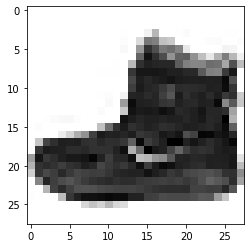

In [38]:
plt.imshow(X_train[0].reshape(28, 28), cmap="binary")

#### **Building GAN**

In [39]:
def plot_multiple_images(images, n_cols=None):
    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1
    if images.shape[-1] == 1:
        images = np.squeeze(images, axis=-1)
    plt.figure(figsize=(n_cols, n_rows))
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image, cmap="binary")
        plt.axis("off")

In [40]:
def train_gan(gan, dataset, batch_size, codings_size, n_epochs=50):
    generator, discriminator = gan.layers
    for epoch in range(n_epochs):
        print("Epoch {}/{}".format(epoch + 1, n_epochs))             
        for X_batch in dataset:
            # phase 1 - training the discriminator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            generated_images = generator(noise)
            X_fake_and_real = tf.concat([generated_images, X_batch], axis=0)
            y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
            discriminator.trainable = True
            discriminator.train_on_batch(X_fake_and_real, y1)
            # phase 2 - training the generator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            y2 = tf.constant([[1.]] * batch_size)
            discriminator.trainable = False
            gan.train_on_batch(noise, y2)
        plot_multiple_images(generated_images, 8)              
        plt.show()    

In [44]:
np.random.seed(42)
tf.random.set_seed(42)

codings_size = 30

generator = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[codings_size]),
    keras.layers.Dense(150, activation="selu"),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
discriminator = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(150, activation="selu"),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(1, activation="sigmoid")
])
gan = keras.models.Sequential([generator, discriminator])

discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

In [47]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

Epoch 1/40


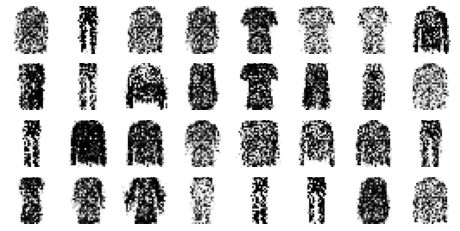

Epoch 2/40


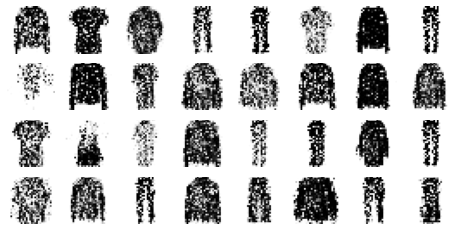

Epoch 3/40


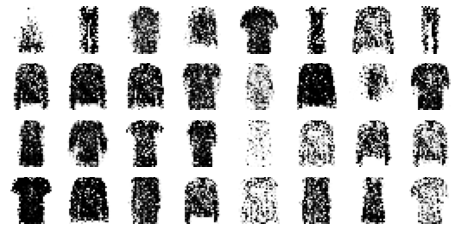

Epoch 4/40


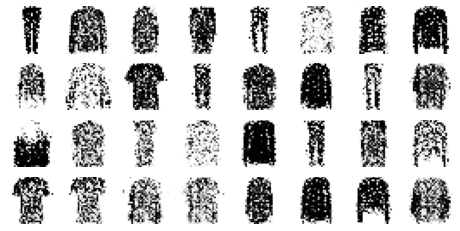

Epoch 5/40


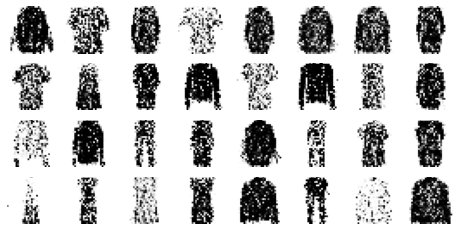

Epoch 6/40


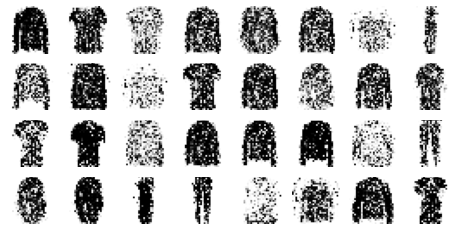

Epoch 7/40


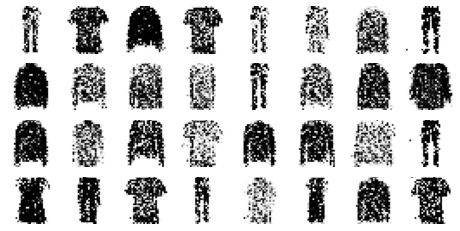

Epoch 8/40


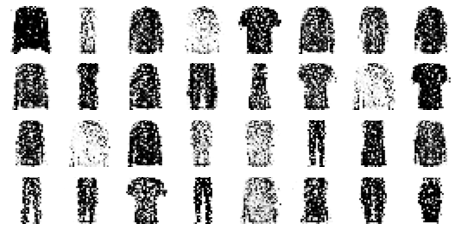

Epoch 9/40


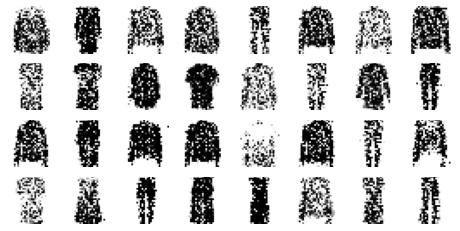

Epoch 10/40


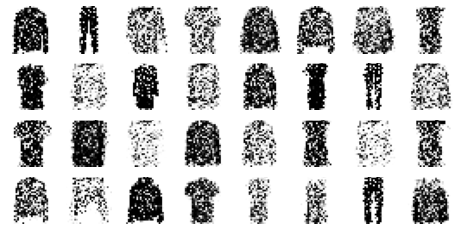

Epoch 11/40


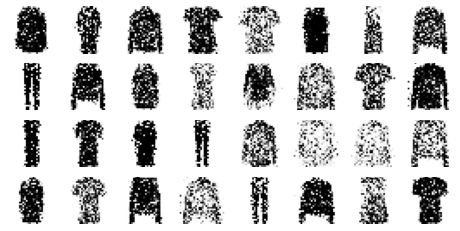

Epoch 12/40


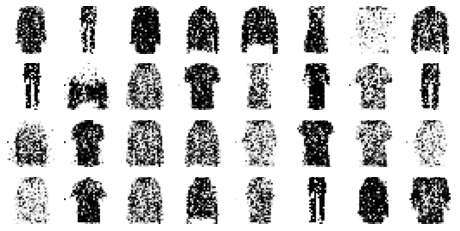

Epoch 13/40


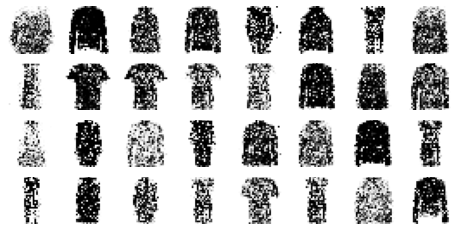

Epoch 14/40


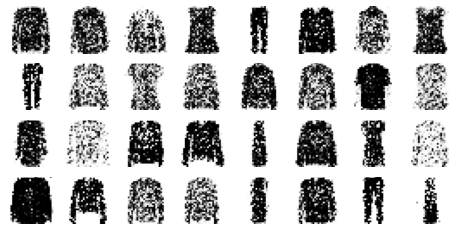

Epoch 15/40


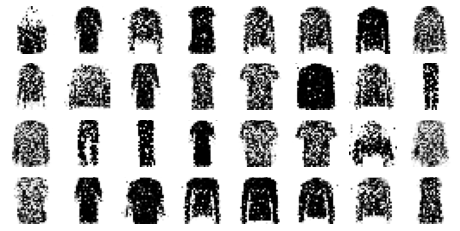

Epoch 16/40


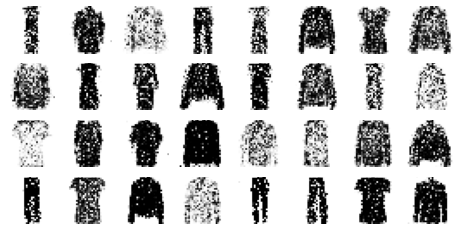

Epoch 17/40


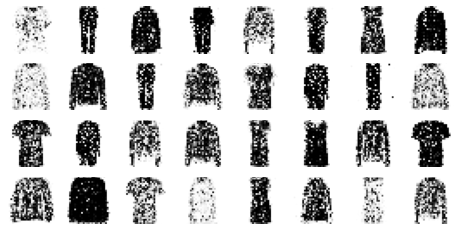

Epoch 18/40


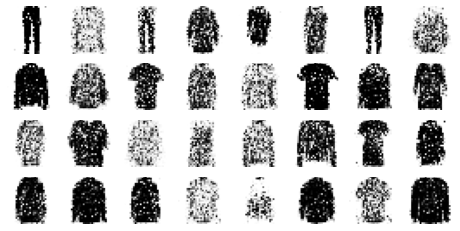

Epoch 19/40


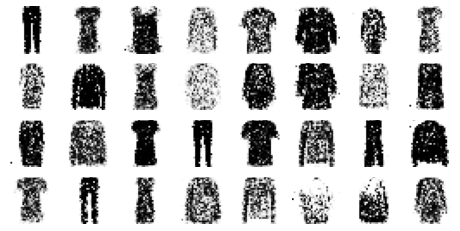

Epoch 20/40


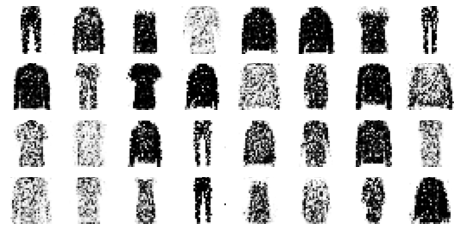

Epoch 21/40


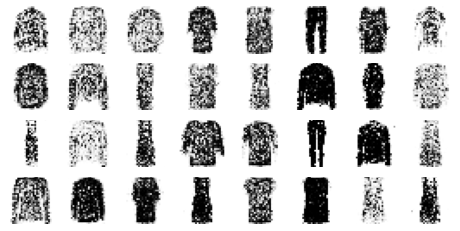

Epoch 22/40


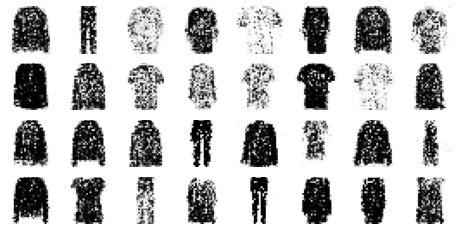

Epoch 23/40


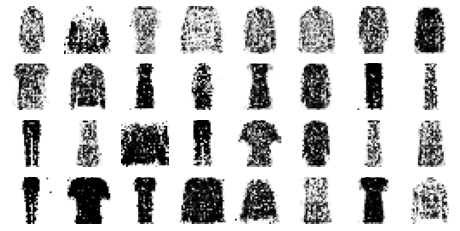

Epoch 24/40


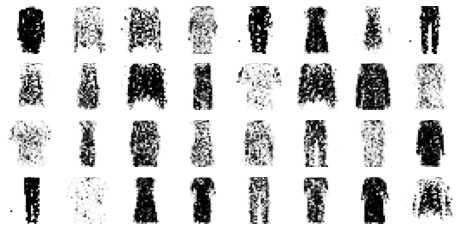

Epoch 25/40


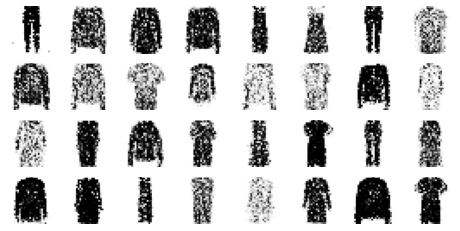

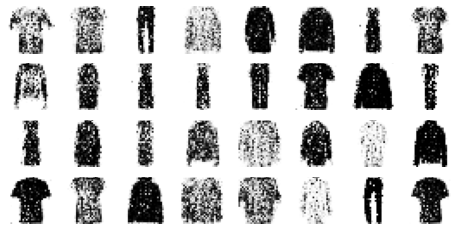

Epoch 28/40


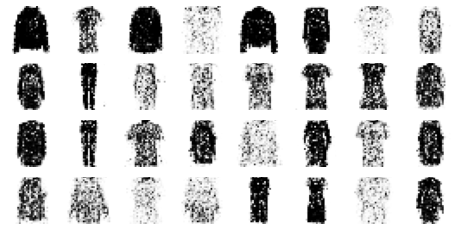

Epoch 29/40


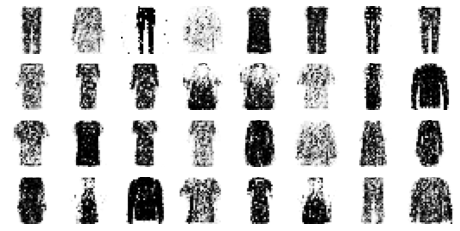

Epoch 30/40


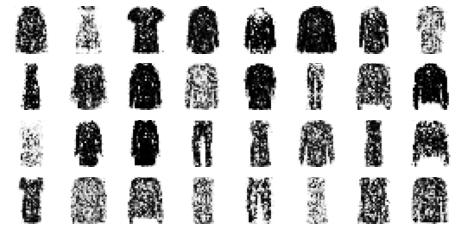

Epoch 31/40


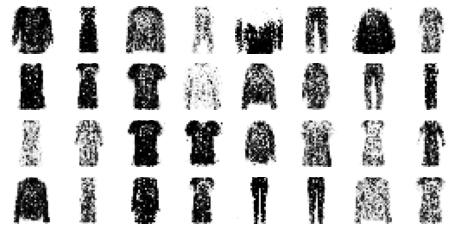

Epoch 32/40


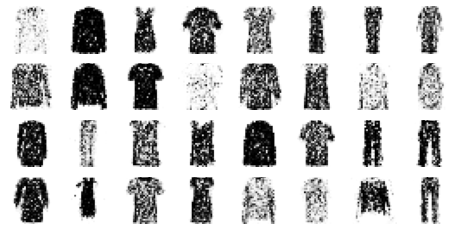

Epoch 33/40


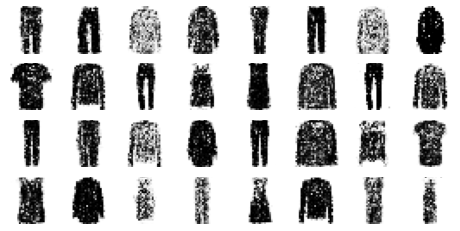

Epoch 34/40


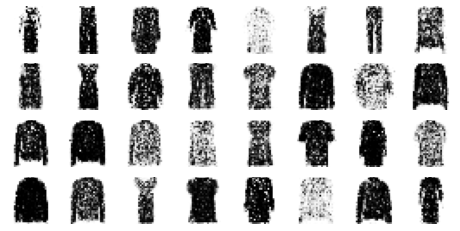

Epoch 35/40


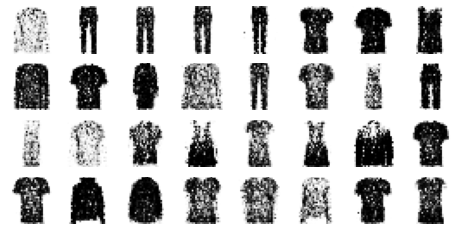

Epoch 36/40


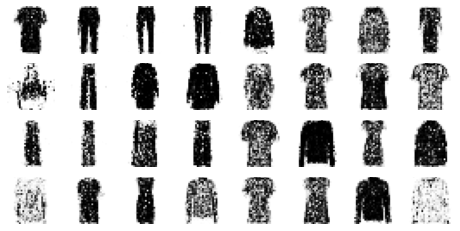

Epoch 37/40


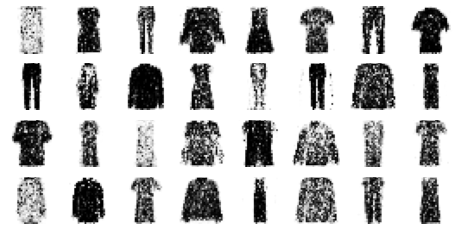

Epoch 38/40


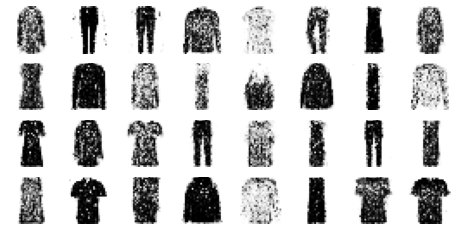

Epoch 39/40


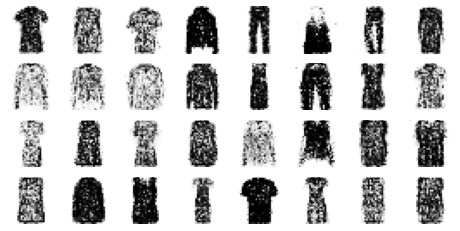

Epoch 40/40


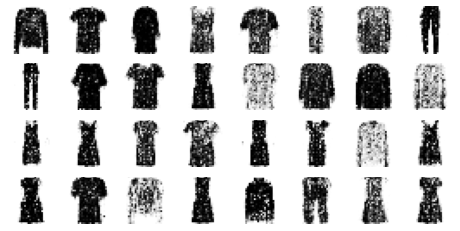

In [48]:
train_gan(gan, dataset, batch_size, codings_size, n_epochs=40)

***mode collapse***

####**Deep Convolutional GAN**

In [51]:
tf.random.set_seed(42)
np.random.seed(42)


latent_size = 100

generator = keras.models.Sequential([
    keras.layers.Dense(7 * 7 * 128, input_shape=[latent_size]),
    keras.layers.Reshape([7, 7, 128]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(64, kernel_size=5, strides=2, padding="same", activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(1, kernel_size=5, strides=2, padding="same", activation="tanh")
])

discriminator = keras.models.Sequential([
    keras.layers.Conv2D(64, kernel_size=5, strides=2, padding="same", activation=keras.layers.LeakyReLU(0.2), input_shape=[28, 28,  1]),
    keras.layers.Dropout(0.4),
    keras.layers.Conv2D(128, kernel_size=5, strides=2, padding="same", activation=keras.layers.LeakyReLU(0.2)),
    keras.layers.Dropout(0.4),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation="sigmoid") 
])

gan = keras.models.Sequential([
   generator,
   discriminator 
])


discriminator.compile(loss='binary_crossentropy', optimizer='rmsprop')
discriminator.trainable = False
gan.compile(loss='binary_crossentropy', optimizer='rmsprop')

Epoch 1/40


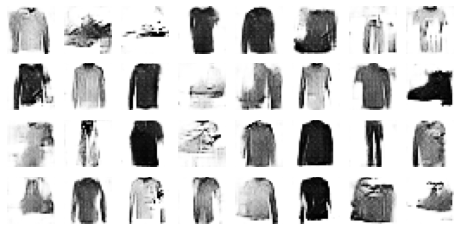

Epoch 2/40


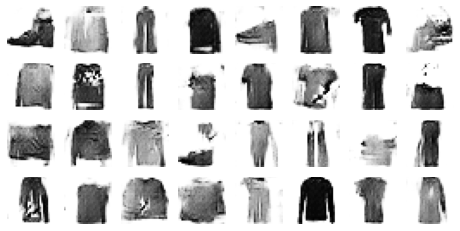

Epoch 3/40


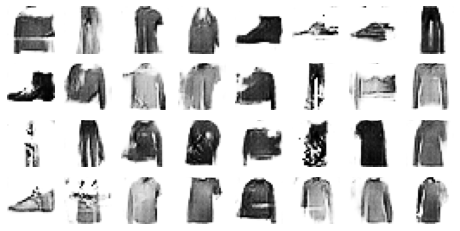

Epoch 4/40


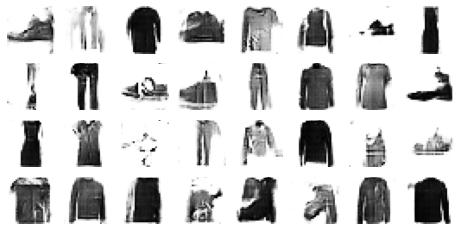

Epoch 5/40


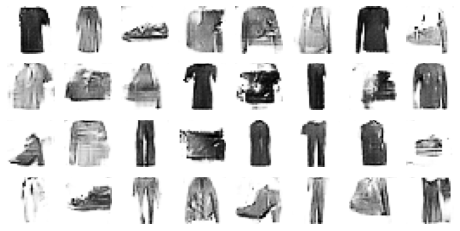

Epoch 6/40


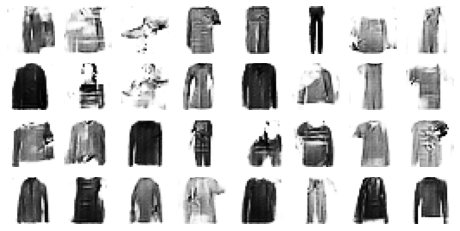

Epoch 7/40


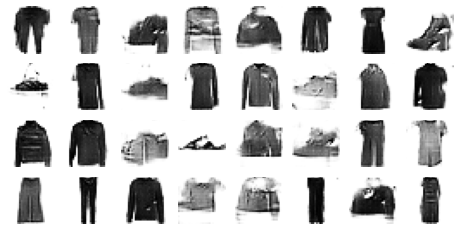

Epoch 8/40


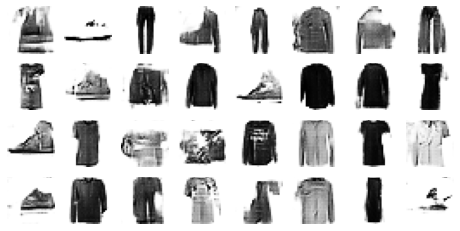

Epoch 9/40


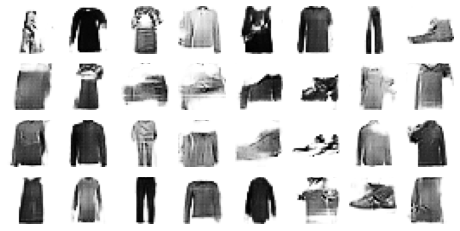

Epoch 10/40


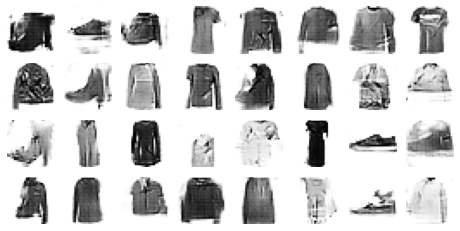

Epoch 11/40


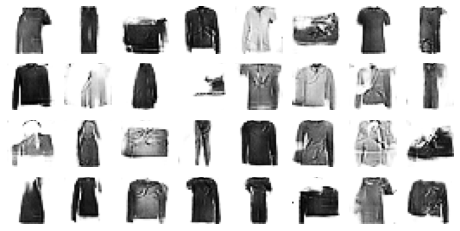

Epoch 12/40


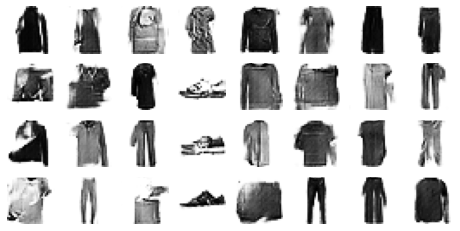

Epoch 13/40


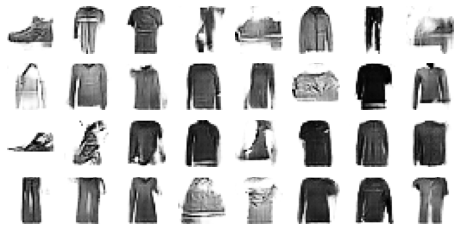

Epoch 14/40


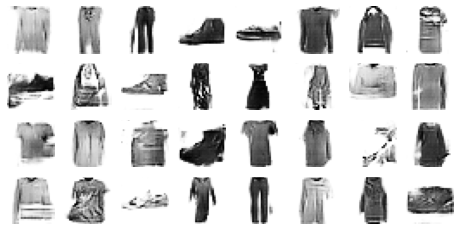

Epoch 15/40


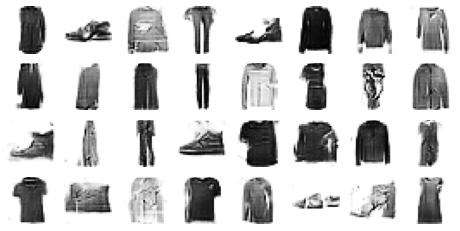

Epoch 16/40


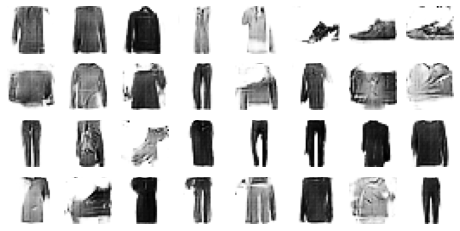

Epoch 17/40


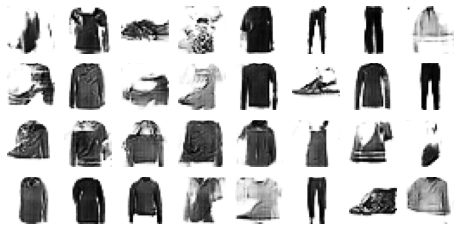

Epoch 18/40


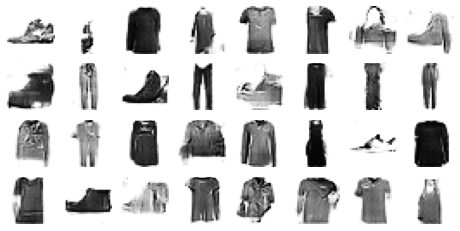

Epoch 19/40


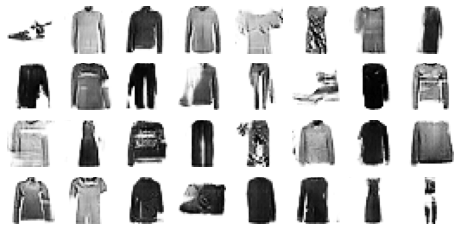

Epoch 20/40


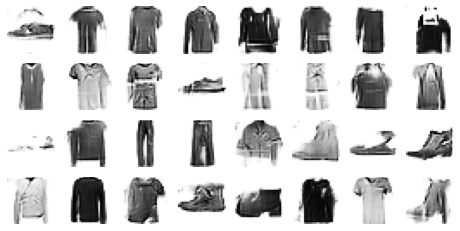

Epoch 21/40


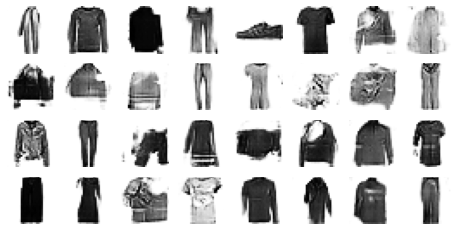

Epoch 22/40


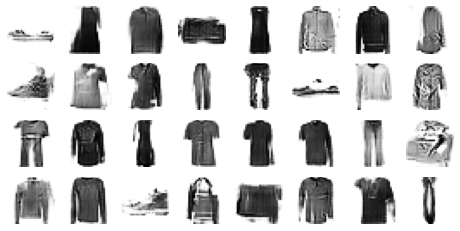

Epoch 23/40


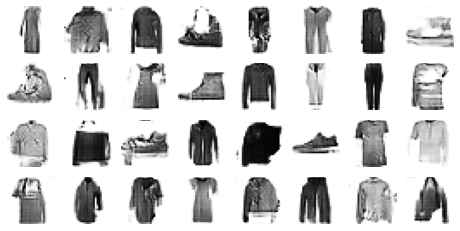

Epoch 24/40


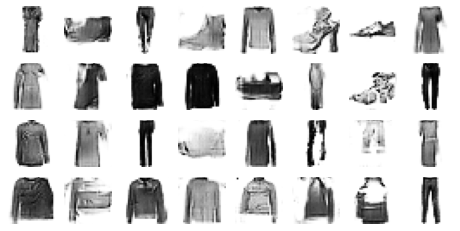

Epoch 25/40


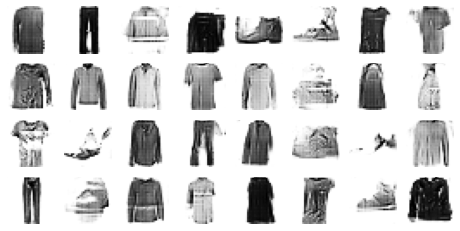

Epoch 26/40


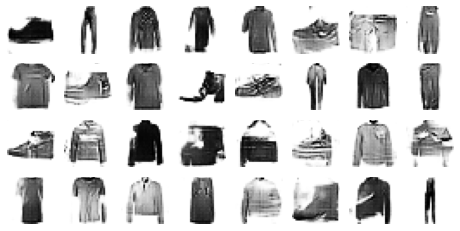

Epoch 27/40


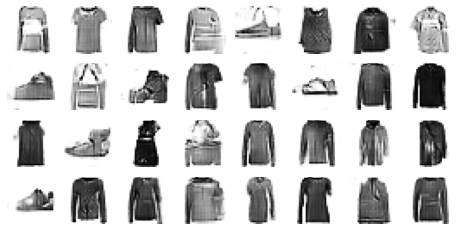

Epoch 28/40


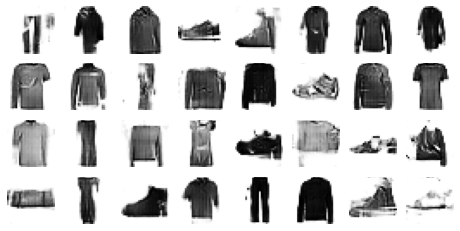

Epoch 29/40


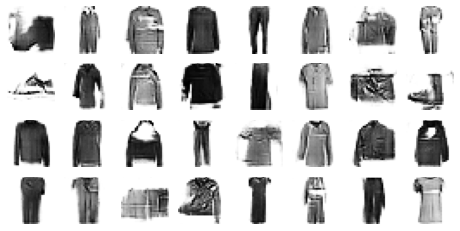

Epoch 30/40


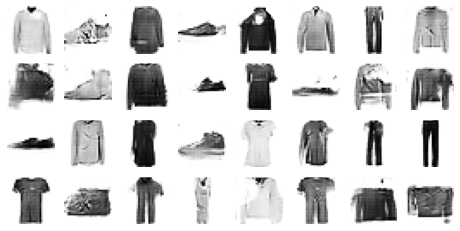

Epoch 31/40


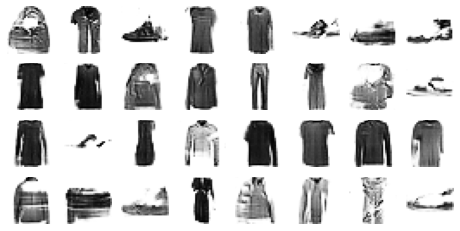

Epoch 32/40


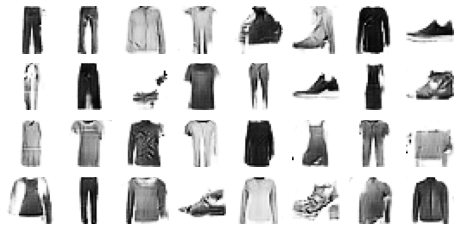

Epoch 33/40


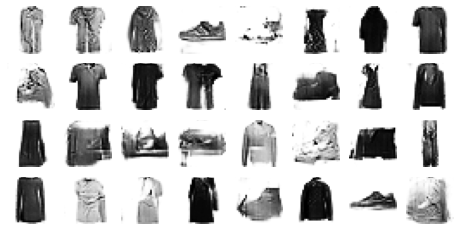

Epoch 34/40


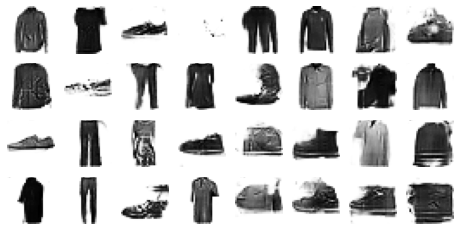

Epoch 35/40


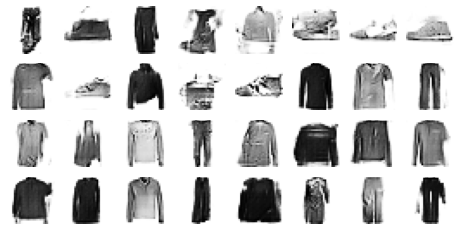

Epoch 36/40


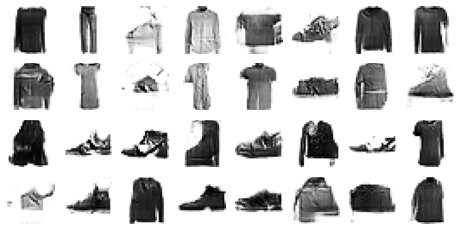

Epoch 37/40


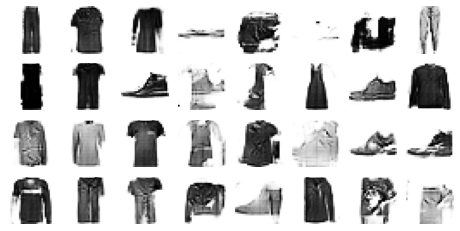

Epoch 38/40


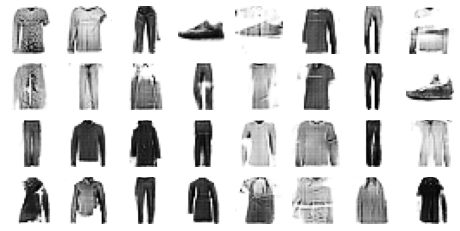

Epoch 39/40


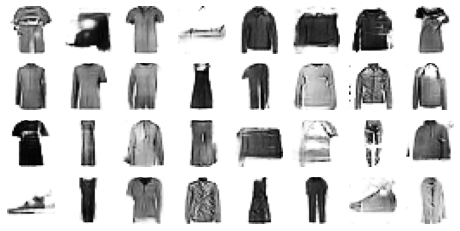

Epoch 40/40


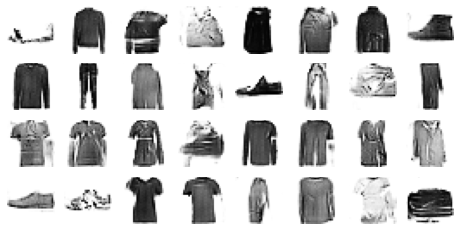

In [52]:
batch_size = 32
### rescale for tanh (0:1 -> -1:1)
X_train_dc = X_train.reshape(-1, 28, 28, 1) * 2 - 1

dataset = tf.data.Dataset.from_tensor_slices(X_train_dc).shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

train_gan(gan, dataset, batch_size, latent_size, 40)